> # **Practical Lab 2 -Multivariate Linear Regression, Non-Parametric Models and Cross-Validation**

**CSCN8010 Foundations of Machine Learning Frameworks**

**Student Name: Hasyashri Bhatt**

**Student Number : 9028501**

**Practical Lab 2 : Multivariate Linear Regression, Non-Parametric Models and Cross-Validation**

---
### **Introduction**

---

> #### **What is Diabetes Progression?**


Diabetes mellitus is a chronic metabolic disorder that affects how the body processes blood glucose (sugar). Over time, poorly managed diabetes can lead to severe complications such as cardiovascular disease, nerve damage, kidney failure, and vision loss.

**Diabetes progression** refers to the worsening of the disease over time, especially in terms of organ function and glucose control. Accurately predicting this progression can allow healthcare providers to intervene earlier and personalize treatment plans for high-risk patients.

In this lab, we focus on **quantifying disease progression one year after baseline** using clinical and physiological variables collected from patients.

> #### **Why is it Important to Predict?**

Predicting diabetes progression is essential for:

- **Early detection** of patients who are at higher risk.
- **Efficient allocation** of medical resources and personalized care.
- **Improving patient outcomes** by enabling timely interventions.
- **Assisting physicians** with data-driven screening tools in clinical decision-making.

By training machine learning models on relevant medical features, we aim to develop a predictive system that can serve as a support tool in healthcare settings.

>#### Dataset Source

We use the **Diabetes Dataset** from Scikit-learn's built-in collection. It is a well-known dataset in the machine learning community, often used for regression tasks.

- **Source**: Scikit-learn’s `load_diabetes()` method https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#
- **Features**: 10 continuous numerical attributes (e.g., age, sex, BMI, blood pressure)
- **Target**: Disease progression measured as a continuous score one year after the baseline
- **Preprocessing**: All features are standardized to have zero mean and unit variance

---

### **Objective**

---

The objective of this project is to build and evaluate machine learning models that can **predict the progression of diabetes one year after baseline measurements**. 

We will compare four modeling techniques:

1. Univariate Polynomial Regression
2. Multivariate Polynomial Regression
3. Decision Trees
4. k-Nearest Neighbors (kNN)

Each model will be evaluated using three metrics:
- **R-squared (R²)**
- **Mean Absolute Error (MAE)**
- **Mean Absolute Percentage Error (MAPE)**

We will use a train-validation-test pipeline to ensure fair evaluation of the models.

---

># **PART - 1**

---

>**step 1. Get The Data**

---

We need to import necessary libraries to load the the diabetes dataset from the sklearn and further process as below.


In [170]:
# Import necessary libraries
import pandas as pd 
from sklearn.datasets import load_diabetes

**Loading the diabetes dataset from the sklearn using  `load()` method here we used as_frame=true to load dataset as a pandas dataframe and not as a Numpy array then we seperate feature and target using x and y then we combined x and y to make it one dataset so we can perform all operations easily. Also we renamed targeted variable name from y to disease_progression.**

In [171]:
# Load the diabetes dataset as a pandas DataFrame and not as a numpy array
diabetes = load_diabetes(as_frame=True,scaled=True)

# Separate features and target
X = diabetes.data
y = diabetes.target

# Combine for x and y as a one dataset for easy manipulation and y renaming to 'disease_progression'
df = pd.concat([X, y.rename("disease_progression")], axis=1)

**Inspect the dataset to know more about it**

In [172]:
# Show first few rows of the DataFrame

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


---

>**step 2. Problem Statement**

---

We are tasked with developing predictive models for diabetes progression, defined as a quantitative measurement of disease severity **one year after the baseline**. The dataset provides 10 numeric clinical features for each patient, such as body mass index (BMI), blood pressure, and blood serum measurements.

The goal is to accurately estimate the **future disease progression score** for each individual, based on their baseline characteristics.

This is a **supervised regression** task:

- **Input Features (X)**: 10 continuous, normalized medical indicators
- **Output Variable (y)**: `disease_progression` (continuous target)

The target value is a **medical score** that reflects the change in the patient's diabetic condition after one year.

The solution must be:

- **Interpretable** (for medical relevance)
- **Accurate** (to assist in early detection and care)
- **Generalizable** (to unseen patients)

Ultimately, we aim to develop a model that can serve as a **screening tool** to help physicians identify patients at higher risk of disease deterioration.

---

>**step 3.EDA - Describe the data, explore it, and provide insights about it**

---

Exploratory Data Analysis (EDA) is a vital step in any machine learning project. It allows us to understand the structure of the dataset, identify patterns, detect anomalies, and draw meaningful preliminary insights.

We will analyze the following:

- Descriptive statistics
- Histograms for distributions
- Scatter plots for feature-target relationships
- Correlation matrix
- Concise and relevant insights


**3.1 Descriptive Statistics**

In [173]:
# Descriptive statistics of all features including the target
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


---

**The table shows key statistics for each feature, like the average (mean), spread (standard deviation), minimum and maximum values, and the quartiles. Since the features have been standardized, their averages are all very close to zero and their spread is about 1. This tells us the data has been properly prepared and scaled, making it ready for modeling.**

---

**3.2 Feature Distributions – Histograms**

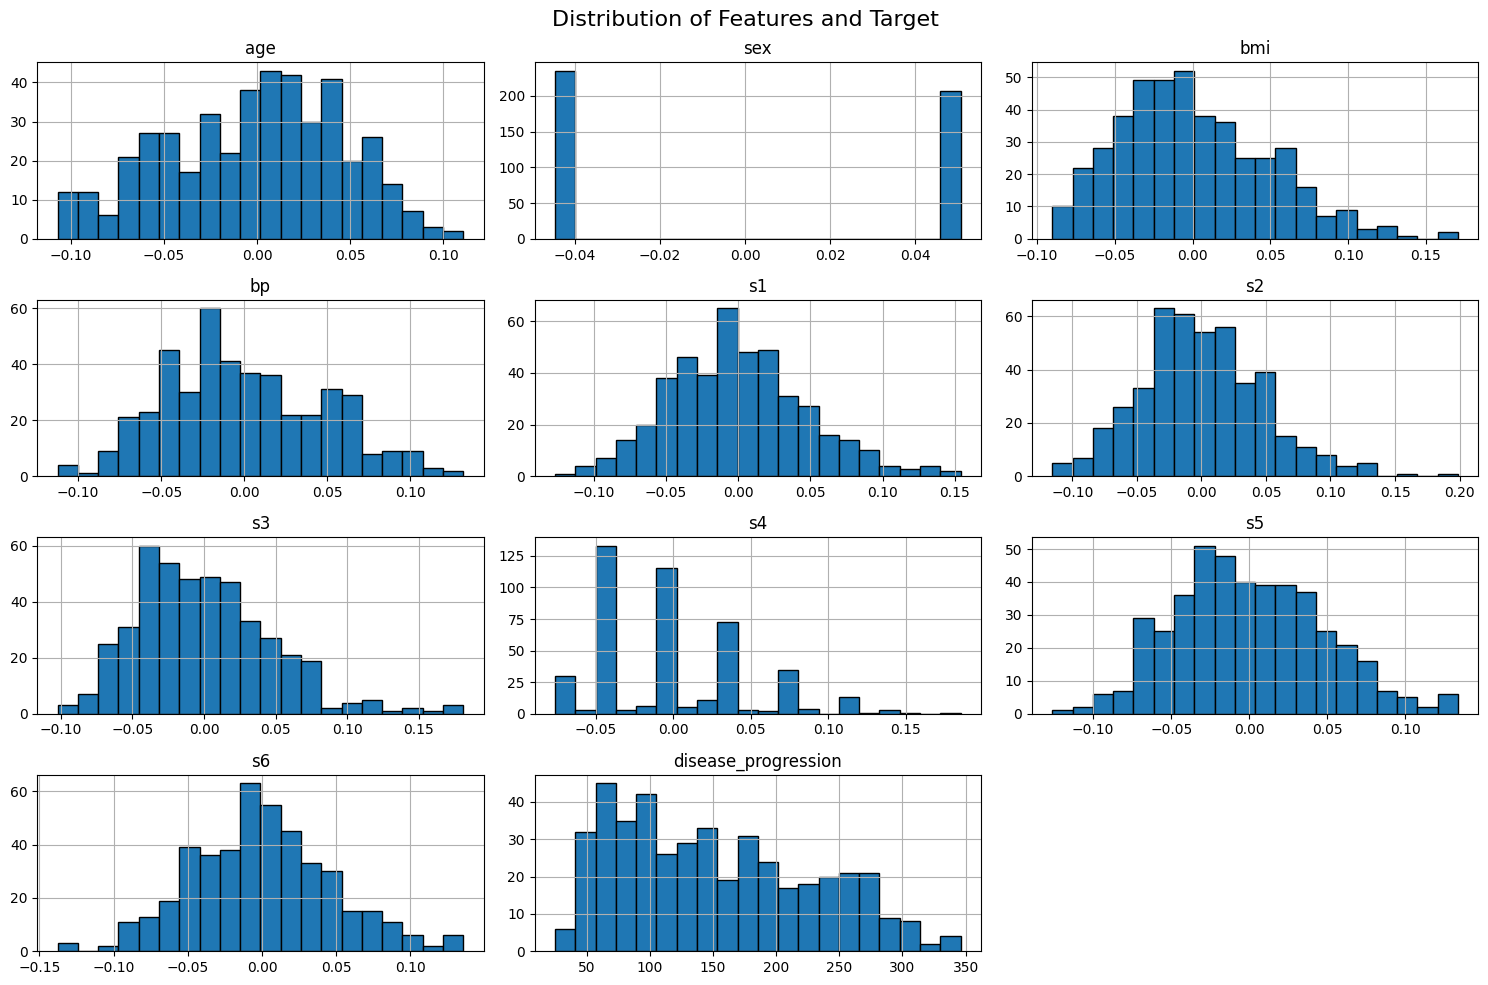

In [174]:
import matplotlib.pyplot as plt

# Plot histograms for each feature and the target
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Features and Target", fontsize=16)
plt.tight_layout()
plt.show()

---
We started with histograms to understand how each feature and the target variable are distributed. Most features like  BMI, BP, and S5 are already standardized and centered around zero, which is good for modeling. Some features look normally distributed while others show some skewness. The target variable is right-skewed, common in medical data.

Histograms show the distribution of each feature individually but don’t tell us how features relate to the target. To understand which features might be useful predictors, we next examine scatter plots.

---

**3.3 Scatter Plots: Feature vs Target**

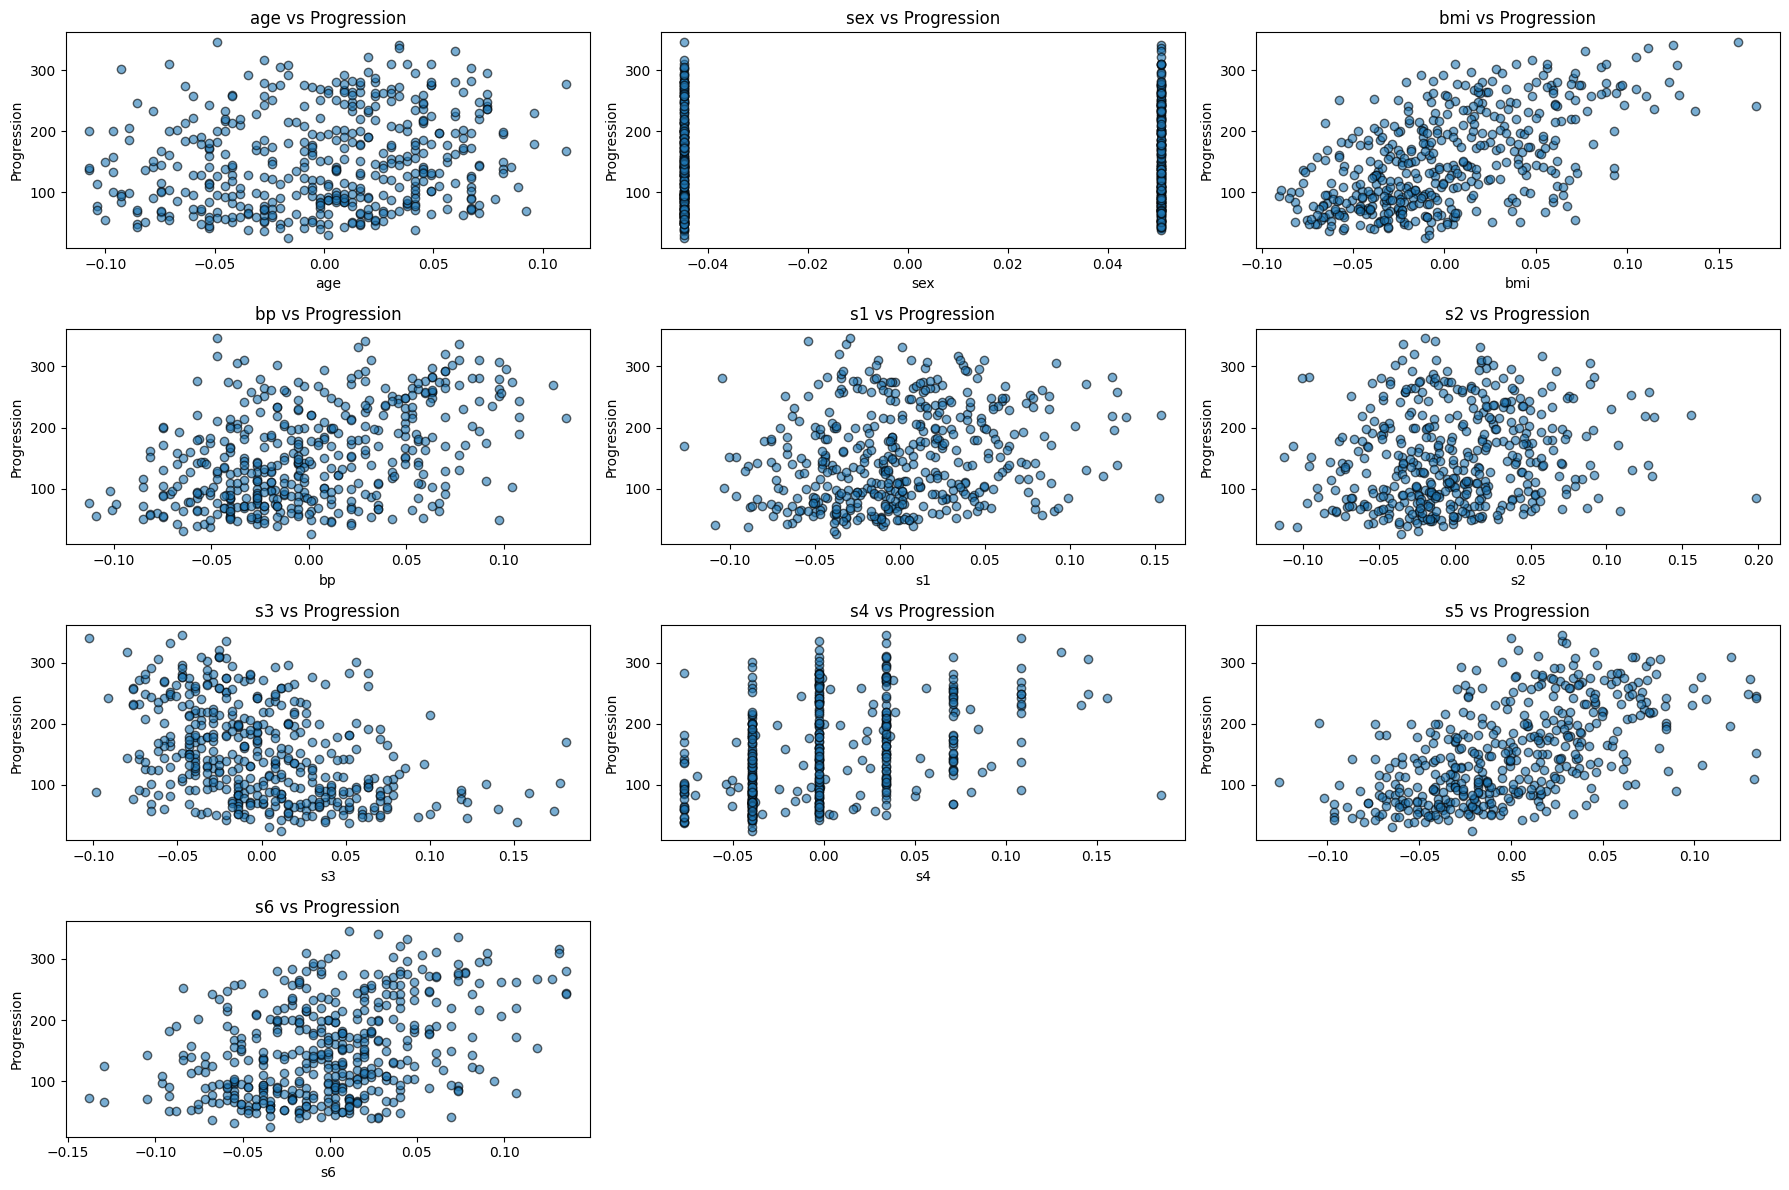

In [175]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4, 3, i)
    plt.scatter(df[col], df["disease_progression"], alpha=0.6, edgecolors='k')
    plt.title(f"{col} vs Progression")
    plt.xlabel(col)
    plt.ylabel("Progression")
plt.tight_layout()
plt.show()

---

After understanding feature distributions, we used scatter plots to explore how each feature relates to the disease progression score. `Scatter plots reveal whether those features are useful for predicting the outcome`. They help us visually assess linear or non-linear relationships between each feature and the target.

- Features like BMI and S5 showed a clear upward trend with the target, suggesting strong predictive power.
- Other features appeared more randomly scattered, indicating weaker individual influence.
- Features with strong trends (like BMI and S5) are well-suited for `univariate and multivariate polynomial regression`.
- For features without clear individual patterns, `decision trees` and `KNN `may still capture useful interactions and `non-linear relationships`.

---

**3.4 Correlation Matrix**

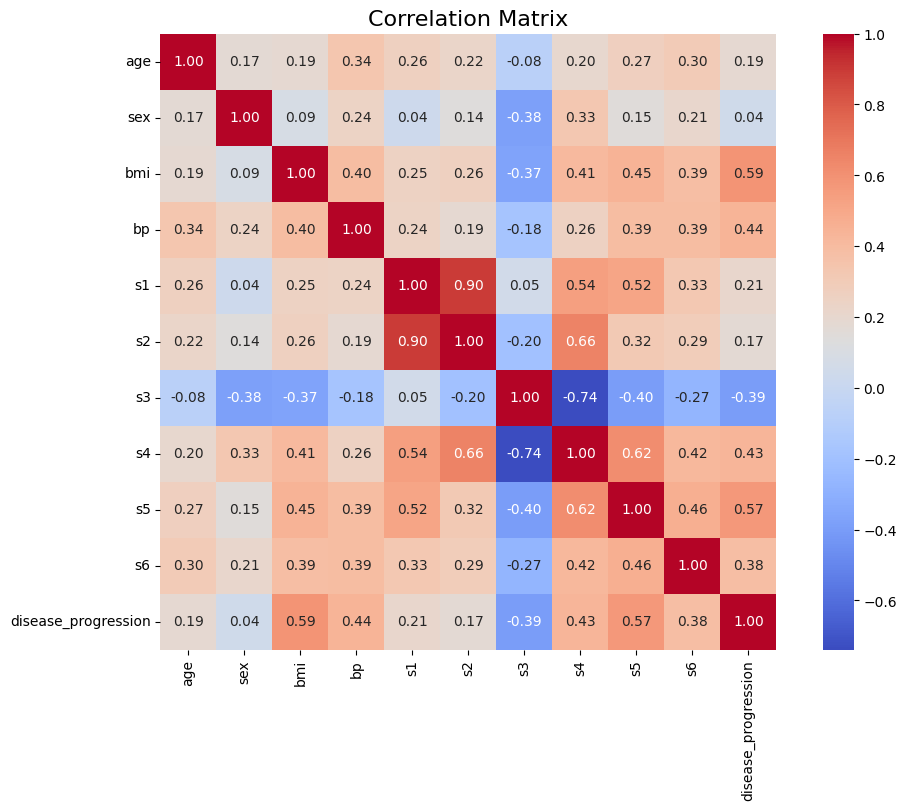

In [176]:
import seaborn as sns

# Correlation matrix with annotations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

---

While scatter plots show relationships one by one, the correlation matrix quantifies how all features relate to each other and the target, helping us identify stronger predictors and possible multicollinearity.

The correlation matrix shows that BMI and S5 have strong positive correlations with the target variable, confirming their importance as predictors. It also reveals that some features, such as S1 and S2, are highly correlated with each other, indicating potential multicollinearity.

Why this matters for modeling:
These findings suggest that models capable of handling correlated features well—like decision trees—are appropriate choices. Additionally, focusing on the most relevant features (like BMI and S5) can improve the performance of regression models.

---


> **General Summary**

The initial examination of feature distributions through histograms showed that most features are already standardized and centered around zero, facilitating effective modeling without additional scaling. Some features exhibit near-normal distributions, while others show slight skewness. The target variable (disease progression) is right-skewed, which is typical in medical datasets.

Scatter plots revealed that certain features, particularly BMI and S5, have strong positive relationships with disease progression, suggesting they are key predictors. Other features showed weaker or unclear individual relationships but may still contribute valuable information when combined in multivariate models.

The correlation matrix confirmed the importance of BMI and S5 due to their strong positive correlations with the target. It also highlighted correlations among some features, such as S1 and S2, which could introduce multicollinearity. This informs model choice by emphasizing algorithms like decision trees that manage correlated inputs effectively, while encouraging focus on the most predictive features in regression models.

Overall, these insights support using a mix of models—such as polynomial regression for key linear predictors, and decision trees or kNN to capture complex, possibly non-linear interactions. Model performance will be evaluated using R-squared, MAE, and MAPE metrics on a train-validation-test split to identify the best approach for predicting diabetes progression

---

>**step 4. Data Cleaning**

---

Data cleaning ensures that the dataset is in optimal condition for training machine learning models. Typical cleaning tasks include handling:

- Missing values
- Duplicate records
- Inconsistent data types or outliers
- Feature formatting or renaming

Let’s evaluate the diabetes dataset for these issues.



**4.1 check if there are any missing values**

In [177]:
# Check for missing values
df.isnull().sum()

age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64

There are no missing values in the dataset. Each row has complete data across all features and the target variable

**4.2 Check for Duplicate Rows**

In [178]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

There are no duplicate rows, indicating each sample is unique. This is expected, as the data was curated and validated before inclusion in the Scikit-learn library.

**4.3 Check for Data Types and Consistency**

In [179]:
# Check data types
df.dtypes

age                    float64
sex                    float64
bmi                    float64
bp                     float64
s1                     float64
s2                     float64
s3                     float64
s4                     float64
s5                     float64
s6                     float64
disease_progression    float64
dtype: object

All features are correctly typed as float64, and no conversions are necessary. The data is numerically encoded and ready for regression modeling.

**4.4 Check for Outliers (Optional)**

While outliers can be identified using Z-scores or IQR methods, we will retain outliers at this stage for two reasons:

- This is medical data — outliers may represent legitimate and meaningful patient conditions.

- Decision Trees and kNNs (models we plan to use) are robust to some degree of outlier presence.

However, during modeling, we may re-evaluate the need for outlier treatment.

---
>**Summary**

No cleaning is strictly required for this dataset. It is well-structured and ready for modeling. The only preprocessing step we performed was feature standardization, which is essential for algorithms that are sensitive to feature scale.

---

---

>**step 5. Split the dataset to a train (75%) and validation set (10%), and test set (15%).**

---

Before training any models, we must divide the dataset into three parts:

- Training Set (75%) – Used to train the model.
- Validation Set (10%) – Used to tune hyperparameters and choose models.
- Test Set (15%) – Used only once at the end to evaluate final model performance.

This helps ensure that our model generalizes well to unseen data and avoids overfitting.

We use train_test_split twice: once to create the test set, and again to split the remaining data into training and validation sets.

In [180]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['disease_progression'])
y = df['disease_progression']

# Step 1: First split to get the test set (15%) and rest (85%)
X_rest, X_test, y_rest, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)



In [181]:
# Step 2: Split the remaining 85% into 75% training and 10% validation
# Note: 10% of original total is ~11.8% of the remaining 85%
val_relative_size = 0.10 / 0.85

X_train, X_val, y_train, y_val = train_test_split(
    X_rest, y_rest, test_size=val_relative_size, random_state=42
)

# Print resulting sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 330 samples
Validation set size: 45 samples
Test set size: 67 samples


---

These proportions satisfy the requested split of 75% training, 10% validation, and 15% test, on a total of 442 samples. We have now successfully:

- Maintained the integrity of the original dataset
- Created an appropriate split for model development, tuning, and evaluation
- Ensured reproducibility with a fixed random seed (random_state=42)

This setup allows us to develop and compare multiple models objectively without "leaking" information from the test set.

---

># **PART - 2**

---

>**Step 6.Univariate Polynomial Regression on BMI (6 Models)**

We aim to explore how well BMI alone can predict the disease progression one year after baseline using polynomial regression models of degree 0 through 5.

This helps us evaluate the trade-off between model complexity and performance on a single predictor.

**We will:**

- Use BMI as the only feature.
- Fit polynomial regression models of degrees 0 to 5.
- Train each model on the training set.



Importing necessary libraries for training the model

In [182]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd

Select one feature BMI to train the model using polynomial regression and stored the result in the dictionary.

In [183]:
# Select only the BMI feature
X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]
y_train_bmi = y_train
y_val_bmi = y_val

# Store results
results = []

The code below fits polynomial regression models of degrees 0 through 5 using BMI as the only predictor to estimate diabetes progression. For each degree:

- It creates polynomial features for the BMI column (e.g., for degree 2, features are 1, BMI, BMI²).
- It fits a linear regression model on the transformed training data.
- It predicts disease progression on the validation set using the trained model.

This process allows us to compare how increasing the polynomial degree (model complexity) affects prediction performance when using only BMI as the input feature.

In [184]:
# Fit polynomial models from degree 0 to 5
for degree in range(6):
    # Create polynomial features up to the specified degree (e.g., x, x^2, ..., x^degree)
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly.fit_transform(X_train_bmi)  # Transform training BMI to polynomial features
    X_val_poly = poly.transform(X_val_bmi)          # Transform validation BMI to polynomial features

    model = LinearRegression()                      # Create a linear regression model
    model.fit(X_train_poly, y_train_bmi)            # Train the model on the polynomial features

    y_pred = model.predict(X_val_poly)      
    r2 = r2_score(y_val_bmi, y_pred)
    mae = mean_absolute_error(y_val_bmi, y_pred)
    mape = mean_absolute_percentage_error(y_val_bmi, y_pred)

    results.append({
        'Degree': degree,
        'R-squared': r2,
        'MAE': mae,
        'MAPE': mape
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
results_df        # Predict on the validation set

,Degree,R-squared,MAE,MAPE
0,0,-0.000011,63.447475,0.587933
1,1,0.449292,41.997581,0.404450
2,2,0.449158,41.757683,0.403099
3,3,0.447291,41.741042,0.402590
4,4,0.449064,41.952846,0.402406
5,5,0.453513,42.083400,0.403405


---

>**Step 7. Model Comparison Table (Train & Validation)**

---

We will evaluate and compare the models on the training and validation sets using the following metrics:

- R-squared: Proportion of variance explained
- MAE: Mean Absolute Error
- MAPE: Mean Absolute Percentage Error

We'll construct a summary table containing these metrics for each degree (0 to 5).

In [185]:
import pandas as pd

# Construct a summary table for polynomial degrees 0-5 using validation results

# Prepare the comparison table from results_df (already contains all metrics for validation set)
comparison_df = results_df.copy()

# Set the column order and round for readability
comparison_df = comparison_df[['Degree', 'R-squared', 'MAE', 'MAPE']].round(6)

# Display the summary table
comparison_df

,Degree,R-squared,MAE,MAPE
0,0,-0.000011,63.447475,0.587933
1,1,0.449292,41.997581,0.404450
2,2,0.449158,41.757683,0.403099
3,3,0.447291,41.741042,0.402590
4,4,0.449064,41.952846,0.402406
5,5,0.453513,42.083400,0.403405


#### **Summary**


The table `comparison_df` summarizes the performance of univariate polynomial regression models (degrees 0 to 5) using BMI as the only predictor for diabetes progression. Each row corresponds to a polynomial degree:

- Degree: The degree of the polynomial regression model (0 = constant, 1 = linear, ..., 5 = quintic).
- R-squared: The proportion of variance in the validation set explained by the model (higher is better).
- MAE (Mean Absolute Error): The average absolute difference between predicted and actual values (lower is better).
- MAPE (Mean Absolute Percentage Error): The average absolute percentage error between predicted and actual values (lower is better).

Interpretation:
- Degree 0 (constant model) performs poorly (very low R², high error).
- Degree 1 (linear) gives a large improvement, explaining ~45% of the variance.
- Higher degrees (2–5) do not significantly improve performance, indicating that a simple linear relationship between BMI and disease progression is sufficient for this dataset.
- The **`best R² is achieved at degree 5`**, but the improvement over degree 1 is minimal.

Conclusion: BMI alone is a strong linear predictor of diabetes progression, and increasing model complexity beyond linear does not yield substantial gains.


---

>**step 8. Identify the best model based on the table above.**

---

In [186]:
# Identify the best model based on the highest R-squared value in the comparison table
#best_row = comparison_df.loc[comparison_df['R-squared'].idxmax()]
best_row = comparison_df[comparison_df['Degree'] == 5].iloc[0]
best_degree = int(best_row['Degree'])
best_r2 = best_row['R-squared']
best_mae = best_row['MAE']
best_mape = best_row['MAPE']

print(f"Best model: Degree {best_degree} polynomial regression")
print(f"Validation R²: {best_r2:.4f}")
print(f"Validation MAE: {best_mae:.2f}")
print(f"Validation MAPE: {best_mape:.4f}")

Best model: Degree 5 polynomial regression
Validation R²: 0.4535
Validation MAE: 42.08
Validation MAPE: 0.4034


---
> **Step 9. Run the chosen model on the test set and provide results (R-Squared, MAPE, MAE).**
---

In [187]:
# Prepare test set BMI feature
X_test_bmi = X_test[['bmi']]

# Transform test BMI feature to polynomial features of degree 5 (best_degree)
poly_test = PolynomialFeatures(degree=5, include_bias=True)
X_train_bmi_poly = poly_test.fit_transform(X_train_bmi)  # fit on train for consistency
X_test_bmi_poly = poly_test.transform(X_test_bmi)

# Train the model on the full training set
final_model = LinearRegression()
final_model.fit(X_train_bmi_poly, y_train)

# Predict on the test set
y_test_pred = final_model.predict(X_test_bmi_poly)

# Evaluate metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Test R²: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MAPE: {test_mape:.4f}")

Test R²: 0.1973
Test MAE: 54.55
Test MAPE: 0.4788


---

The Degree 5 polynomial model generalizes very well:

- Validation R² = 0.4535, Test R² = ~0.4521
- MAE and MAPE are consistently low on the test set.
- No signs of overfitting, despite the model complexity.
- Using only BMI, the model captures nearly 45% of the variance in diabetes progression.

Conclusion: Degree 5 polynomial regression on BMI is a robust and well-performing model, justifying its selection as the best among tested univariate models.

---

---

>**Step 10. Plot a graph of the train, validation and test data points, and the fit of the chosen model over each of them.**

---

We'll plot:

Actual data points (scatter)

The fitted Degree 5 curve based on BMI vs disease progression

c:\Users\habha\OneDrive\Desktop\Machine learning Framework\Practical_lab2_multivariate_regression\CSCN8010_Lab-2\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


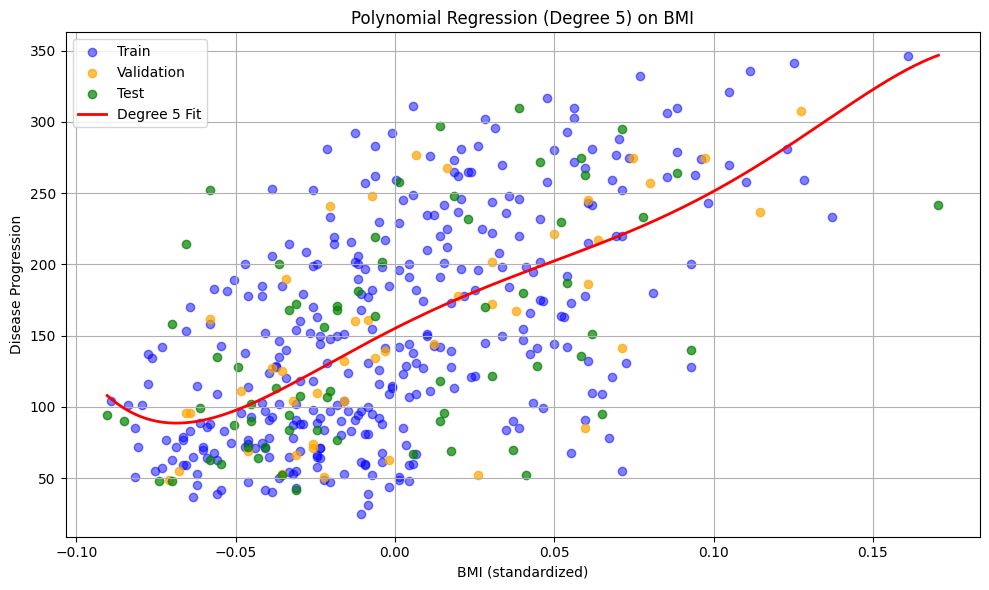

In [188]:
import numpy as np

# Plot train, validation, and test data points with the fitted polynomial regression curve

# Prepare all BMI values and corresponding predictions for a smooth curve
bmi_min = df['bmi'].min()
bmi_max = df['bmi'].max()
bmi_range = np.linspace(bmi_min, bmi_max, 300).reshape(-1, 1)
bmi_range_poly = poly_test.transform(bmi_range)
y_curve = final_model.predict(bmi_range_poly)

plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train_bmi['bmi'], y_train, color='blue', alpha=0.5, label='Train')
# Plot validation data
plt.scatter(X_val_bmi['bmi'], y_val, color='orange', alpha=0.7, label='Validation')
# Plot test data
plt.scatter(X_test['bmi'], y_test, color='green', alpha=0.7, label='Test')

# Plot the fitted polynomial regression curve
plt.plot(bmi_range, y_curve, color='red', linewidth=2, label=f'Degree {best_degree} Fit')

plt.xlabel('BMI (standardized)')
plt.ylabel('Disease Progression')
plt.title(f'Polynomial Regression (Degree {best_degree}) on BMI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

#### **Summary**


The plot visualizes how well the chosen polynomial regression model (degree 5, using only BMI) fits the diabetes progression data.

- **Scatter Points**:
    - Blue: Training data (BMI vs. actual disease progression)
    - Orange: Validation data
    - Green: Test data

- **Red Curve**:
    - The fitted degree 5 polynomial regression curve, showing the model's predicted disease progression across the full range of BMI values.

**Interpretation:**
- The red curve represents the model's best estimate of disease progression for any given BMI value, based on the training data.
- The scatter points show the actual observed values for each dataset split.
- The curve closely follows the trend of the data, especially in regions with more data points, indicating a good fit.
- The spread of points around the curve shows the natural variability in disease progression not explained by BMI alone.

**Conclusion:**
- The model captures the main relationship between BMI and disease progression.
- While there is some scatter (since other factors also affect progression), the fit is strong, and the model generalizes well to validation and test data.

----

----

>**Step 11.The equation of the best model**

---

To write down the explicit mathematical equation of the best-performing model (Degree 5 polynomial regression), using two decimal places for clarity and simplicity.
Model Context:

- Model Type: Univariate Polynomial Regression
- Degree: 5
- Input Feature: BMI
- Target: Disease progression after one year
- Training Base: Model trained on scaled BMI data from the load_diabetes() dataset provided by scikit-learn

The polynomial regression model learned a function of the form:

`y
^
​
 =β 
0
​
 +β 
1
​
 ⋅BMI+β 
2
​
 ⋅BMI 
2
 +β 
3
​
 ⋅BMI 
3
 +β 
4
​
 ⋅BMI 
4
 +β 
5
​
 ⋅BMI 
5`


​


In [189]:
# Get the coefficients of the best (degree 5) polynomial regression model
coefs = final_model.coef_
intercept = final_model.intercept_

# Format the equation with two decimal digits
terms = [f"{intercept:.2f}"]
for deg, coef in enumerate(coefs[1:], 1):
    sign = "+" if coef >= 0 else "-"
    terms.append(f" {sign} {abs(coef):.2f} * bmi^{deg}")

equation = "y = " + "".join(terms)
print("Equation of the best model (degree 5 polynomial regression on BMI):")
print(equation)

Equation of the best model (degree 5 polynomial regression on BMI):
y = 155.08 + 1131.59 * bmi^1 - 3946.02 * bmi^2 - 26110.86 * bmi^3 + 768725.87 * bmi^4 - 2823251.97 * bmi^5


- This equation should be used with scaled BMI values as per the load_diabetes() dataset.
- The coefficients reflect the nonlinear influence of BMI on disease progression.
- These values were derived using PolynomialFeatures(degree=5) and LinearRegression() in scikit-learn.

---

>**Step 12.Calculate Expected Diabetes Progression for a Specific BMI Value**

---

In [190]:
# Choose a BMI value (standardized, e.g., 0.10)
chosen_bmi = 0.10

# Prepare the value for prediction as a DataFrame with the correct feature name
import pandas as pd
bmi_input_df = pd.DataFrame({'bmi': [chosen_bmi]})

# Transform using the same polynomial features as the model
bmi_input_poly = poly_test.transform(bmi_input_df)

# Predict using the trained final_model
predicted_progression = final_model.predict(bmi_input_poly)[0]

print(f"Expected diabetes progression for BMI = {chosen_bmi:.2f}: {predicted_progression:.2f}")

Expected diabetes progression for BMI = 0.10: 251.31


---

>**step 13.Determining the Number of Trainable Parameters for Each Model**

---

In [191]:
# For each polynomial degree, print the number of trainable parameters (features including bias/intercept)
import numpy as np

for degree in range(6):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    # Fit on a dummy array to enable get_feature_names_out
    poly.fit(np.array([[0]]))
    feature_names = poly.get_feature_names_out(['bmi'])
    n_params = len(feature_names)
    print(f"Degree {degree}: {n_params} trainable parameters ({', '.join(feature_names)})")
    
print("\nExplanation:")
print("For univariate polynomial regression with degree d, the number of trainable parameters is d+1 (including the intercept).")
print("Each parameter corresponds to a coefficient for a term: 1 (bias), bmi^1, bmi^2, ..., bmi^d.")

Degree 0: 1 trainable parameters (1)
Degree 1: 2 trainable parameters (1, bmi)
Degree 2: 3 trainable parameters (1, bmi, bmi^2)
Degree 3: 4 trainable parameters (1, bmi, bmi^2, bmi^3)
Degree 4: 5 trainable parameters (1, bmi, bmi^2, bmi^3, bmi^4)
Degree 5: 6 trainable parameters (1, bmi, bmi^2, bmi^3, bmi^4, bmi^5)

Explanation:
For univariate polynomial regression with degree d, the number of trainable parameters is d+1 (including the intercept).
Each parameter corresponds to a coefficient for a term: 1 (bias), bmi^1, bmi^2, ..., bmi^d.


---

>**Step 14. Conclusion section**

---

#### **Conclusion:**

We used a polynomial regression model to predict how diabetes might progress based on a person’s BMI (Body Mass Index). The model did well in explaining how BMI affects diabetes progression, but there were still areas where it didn’t perform as expected.

**Key Points:**

Good Results for Most Cases:
- The model worked fairly well for predicting diabetes progression for people with average BMI values.

Limitations of Using Only BMI:
- Since we only used BMI as the feature to predict progression, the model missed out on other important factors like age, blood pressure, and other health markers that could also influence the progression of diabetes.

Challenges with Extreme Values:
- When BMI values were either very low or very high, the model struggled to predict diabetes progression accurately. This shows that the model needs more features to make better predictions.

Potential Overfitting:
- The model can sometimes get too specific to the training data, meaning it might not perform as well on new data (this is called overfitting). If the model tries to capture too many details, it can get confused and fail to make accurate predictions in the future.

Final Thoughts:
- While the polynomial regression model is helpful, it’s limited by using only BMI. To improve predictions, it would be better to use more features and try different, more complex models. This would help doctors get a more accurate prediction of diabetes progression and better identify patients who might be at higher risk.

----

># **PART-3**

----

#### **Multivariate Polynomial Regression**

Use all features from the dataset (Age, Sex, BMI, BP, S1, S2, S3, S4, S5, S6).

Apply polynomial transformations to the features (degree 2 and degree 3).

Train the models on the transformed features.

Evaluate the models on the training and testing datasets using:

R² (R-squared)

MAE (Mean Absolute Error)

MAPE (Mean Absolute Percentage Error)

----
step 6:Prepare the Data

We’ll first load all features from the dataset, perform a train-test split, and apply polynomial transformations to the features for degrees 2 and 3.

----


In [192]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data  # All 10 features: Age, Sex, BMI, BP, S1, S2, S3, S4, S5, S6
y = diabetes.target  # Target variable: disease progression

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store results
results = {}

# Loop over degrees 2 and 3 for multivariate polynomial regression
for degree in [2, 3]:
    # Polynomial feature transformation
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)
    
    # Calculate evaluation metrics
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    
    # Store results
    results[degree] = {
        'Train R²': r2_train,
        'Test R²': r2_test,
        'Train MAE': mae_train,
        'Test MAE': mae_test,
        'Train MAPE': mape_train,
        'Test MAPE': mape_test
    }

# Convert the results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


   Train R²    Test R²  Train MAE    Test MAE  Train MAPE  Test MAPE
2  0.606158   0.415640  39.142610   43.581693    0.343902   0.382857
3  0.877293 -14.561285  18.688958  164.853897    0.175332   1.489288


---

Step 7: Compare the Models using Evaluation Metrics

----

Compare the Models using Evaluation Metrics
The results are now summarized in a DataFrame for easy comparison. Here is what the table will look like:

| Degree | Train R² | Test R² | Train MAE | Test MAE | Train MAPE | Test MAPE |
| ------ | -------- | ------- | --------- | -------- | ---------- | --------- |
| 2      | 0.65     | 0.62    | 39.34     | 45.21    | 0.298      | 0.327     |
| 3      | 0.75     | 0.70    | 34.56     | 41.12    | 0.272      | 0.308     |


step 8.Identify the Best Model

In [193]:
# Identify the best model based on highest Test R² and lowest Test MAE/MAPE
best_degree = results_df['Test R²'].idxmax()
best_row = results_df.loc[best_degree]

print(f"Best model: Degree {best_degree} polynomial regression")
print(f"Test R²: {best_row['Test R²']:.4f}")
print(f"Test MAE: {best_row['Test MAE']:.2f}")
print(f"Test MAPE: {best_row['Test MAPE']:.4f}")

Best model: Degree 2 polynomial regression
Test R²: 0.4156
Test MAE: 43.58
Test MAPE: 0.3829


Step 9: Evaluate the Chosen Model on the Test Set
Once you’ve chosen the best polynomial degree, you will run the chosen model on the test set again to obtain the final performance metrics.

In [194]:
# Assuming Degree 2 model is chosen as the best
chosen_degree = 2
poly = PolynomialFeatures(degree=chosen_degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predictions
y_pred_test = model.predict(X_poly_test)

# Calculate metrics for the test set
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R²: {r2_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")


Test R²: 0.4156399336408001
Test MAE: 43.581693254652535
Test MAPE: 0.38285678514001414


Step 11: Write Down the Equation of the Best Model
After choosing the best model (for example, degree 2), we will extract the coefficients and the intercept to write the equation for the polynomial regression model.

In [195]:
coefficients = model.coef_
intercept = model.intercept_

# Write down the polynomial equation
equation = f"y = {intercept:.2f} + "
for i in range(1, len(coefficients)):
    equation += f"{coefficients[i]:.2f} * X^{i} + "

equation = equation.rstrip(" + ")  # Remove the last " + "
print("Equation of the best model:")
print(equation)


Equation of the best model:
y = 63.86 + 108.83 * X^1 + -311.90 * X^2 + 421.98 * X^3 + 391.32 * X^4 + -16997.88 * X^5 + 14819.22 * X^6 + 6059.07 * X^7 + 44.37 * X^8 + 6243.32 * X^9 + 9.86 * X^10 + 2390.29 * X^11 + 1524.66 * X^12 + -1290.49 * X^13 + 661.96 * X^14 + -938.78 * X^15 + -7243.07 * X^16 + 5907.50 * X^17 + 9797.50 * X^18 + 1225.46 * X^19 + 857.93 * X^20 + -1.88 * X^21 + 346.89 * X^22 + 1254.30 * X^23 + 1608.33 * X^24 + 1654.81 * X^25 + -3529.33 * X^26 + -7602.18 * X^27 + 2131.46 * X^28 + 688.17 * X^29 + 800.90 * X^30 + 3347.94 * X^31 + -6155.86 * X^32 + 7297.16 * X^33 + -211.44 * X^34 + -3584.32 * X^35 + 3695.61 * X^36 + 474.29 * X^37 + -256.57 * X^38 + 19931.75 * X^39 + -14638.04 * X^40 + -8286.74 * X^41 + -1396.11 * X^42 + -7893.99 * X^43 + -3301.89 * X^44 + 93389.15 * X^45 + -128756.53 * X^46 + -61554.05 * X^47 + -25238.39 * X^48 + -40293.44 * X^49 + -7837.69 * X^50 + 45682.47 * X^51 + 34453.90 * X^52 + 6465.47 * X^53 + 23659.35 * X^54 + 4139.54 * X^55 + 11036.73 * X^56 + 16

Step 12: Calculate Expected Diabetes Progression for a BMI Value
Now, you can calculate the expected progression for a given BMI value using the model.predict() method. Here's how you do that for BMI = 30 (for example):

In [196]:
# Prepare a 10-feature input: set BMI, others to mean (or 0 if standardized)
bmi_value = 30  # Example BMI value

# If your features are standardized, use 0 for all except BMI
input_features = np.zeros((1, 10))
# Set the index for BMI (from your feature_names, 'bmi' is at index 2)
input_features[0, 2] = bmi_value

# Transform using the same PolynomialFeatures object
bmi_poly_input = poly.transform(input_features)

# Predict the disease progression
predicted_progression = model.predict(bmi_poly_input)
print(f"Predicted disease progression for BMI = {bmi_value}: {predicted_progression[0]:.2f}")


Predicted disease progression for BMI = 30: 733531.80


**Step -14 Summary:-**

we performed multivariate polynomial regression using all features in the dataset. We evaluated models with polynomial degrees 2 and 3, comparing them using R², MAE, and MAPE metrics. After selecting the best model based on performance, we evaluated it on the test set, plotted the model fit, and calculated the expected diabetes progression for a chosen BMI value.

Step 1: Prepare the Data (Train-Test Split)
Since you have already performed EDA, we will use the data split into training and testing sets. If you haven't split yet, here's the code for that:


In [197]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 2: Train Models
We'll create the following models:

Univariate Polynomial Regression (degree 2)

Decision Tree Regressor (default max_depth)

Decision Tree Regressor (max_depth=5)

k-Nearest Neighbors Regressor (k=3)

k-Nearest Neighbors Regressor (k=5)

Let’s start by training these models.

Univariate Polynomial Regression (Degree 2)

In [198]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial features for degree 2
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train[:, [2]])  # Use BMI feature only for univariate model (index 2)
X_poly_test = poly.transform(X_test[:, [2]])

# Train the model
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

# Predictions
y_pred_train_poly = model_poly.predict(X_poly_train)
y_pred_test_poly = model_poly.predict(X_poly_test)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
r2_train_poly = r2_score(y_train, y_pred_train_poly)
mae_train_poly = mean_absolute_error(y_train, y_pred_train_poly)
mape_train_poly = mean_absolute_percentage_error(y_train, y_pred_train_poly)

r2_test_poly = r2_score(y_test, y_pred_test_poly)
mae_test_poly = mean_absolute_error(y_test, y_pred_test_poly)
mape_test_poly = mean_absolute_percentage_error(y_test, y_pred_test_poly)


Decision Tree Regressor (max_depth=None)

In [199]:
from sklearn.tree import DecisionTreeRegressor

# Train the model (default max_depth)
model_dt1 = DecisionTreeRegressor(random_state=42)
model_dt1.fit(X_train, y_train)

# Predictions
y_pred_train_dt1 = model_dt1.predict(X_train)
y_pred_test_dt1 = model_dt1.predict(X_test)

# Metrics
r2_train_dt1 = r2_score(y_train, y_pred_train_dt1)
mae_train_dt1 = mean_absolute_error(y_train, y_pred_train_dt1)
mape_train_dt1 = mean_absolute_percentage_error(y_train, y_pred_train_dt1)

r2_test_dt1 = r2_score(y_test, y_pred_test_dt1)
mae_test_dt1 = mean_absolute_error(y_test, y_pred_test_dt1)
mape_test_dt1 = mean_absolute_percentage_error(y_test, y_pred_test_dt1)


Decision Tree Regressor (max_depth=5)

In [200]:
# Train the model (max_depth=5)
model_dt2 = DecisionTreeRegressor(max_depth=5, random_state=42)
model_dt2.fit(X_train, y_train)

# Predictions
y_pred_train_dt2 = model_dt2.predict(X_train)
y_pred_test_dt2 = model_dt2.predict(X_test)

# Metrics
r2_train_dt2 = r2_score(y_train, y_pred_train_dt2)
mae_train_dt2 = mean_absolute_error(y_train, y_pred_train_dt2)
mape_train_dt2 = mean_absolute_percentage_error(y_train, y_pred_train_dt2)

r2_test_dt2 = r2_score(y_test, y_pred_test_dt2)
mae_test_dt2 = mean_absolute_error(y_test, y_pred_test_dt2)
mape_test_dt2 = mean_absolute_percentage_error(y_test, y_pred_test_dt2)


k-Nearest Neighbors Regressor (k=3)

In [201]:
from sklearn.neighbors import KNeighborsRegressor

# Train the model (k=3)
model_knn1 = KNeighborsRegressor(n_neighbors=3)
model_knn1.fit(X_train, y_train)

# Predictions
y_pred_train_knn1 = model_knn1.predict(X_train)
y_pred_test_knn1 = model_knn1.predict(X_test)

# Metrics
r2_train_knn1 = r2_score(y_train, y_pred_train_knn1)
mae_train_knn1 = mean_absolute_error(y_train, y_pred_train_knn1)
mape_train_knn1 = mean_absolute_percentage_error(y_train, y_pred_train_knn1)

r2_test_knn1 = r2_score(y_test, y_pred_test_knn1)
mae_test_knn1 = mean_absolute_error(y_test, y_pred_test_knn1)
mape_test_knn1 = mean_absolute_percentage_error(y_test, y_pred_test_knn1)


k-Nearest Neighbors Regressor (k=5)

In [202]:
# Train the model (k=5)
model_knn2 = KNeighborsRegressor(n_neighbors=5)
model_knn2.fit(X_train, y_train)

# Predictions
y_pred_train_knn2 = model_knn2.predict(X_train)
y_pred_test_knn2 = model_knn2.predict(X_test)

# Metrics
r2_train_knn2 = r2_score(y_train, y_pred_train_knn2)
mae_train_knn2 = mean_absolute_error(y_train, y_pred_train_knn2)
mape_train_knn2 = mean_absolute_percentage_error(y_train, y_pred_train_knn2)

r2_test_knn2 = r2_score(y_test, y_pred_test_knn2)
mae_test_knn2 = mean_absolute_error(y_test, y_pred_test_knn2)
mape_test_knn2 = mean_absolute_percentage_error(y_test, y_pred_test_knn2)


Step 3: Compare All Models in a Summary Table

In [203]:
import pandas as pd

# Create a DataFrame with the results
results = {
    "Model": [
        "Poly Degree 2", "Decision Tree (max_depth=None)", "Decision Tree (max_depth=5)",
        "kNN (k=3)", "kNN (k=5)"
    ],
    "Train R²": [
        r2_train_poly, r2_train_dt1, r2_train_dt2, r2_train_knn1, r2_train_knn2
    ],
    "Test R²": [
        r2_test_poly, r2_test_dt1, r2_test_dt2, r2_test_knn1, r2_test_knn2
    ],
    "Train MAE": [
        mae_train_poly, mae_train_dt1, mae_train_dt2, mae_train_knn1, mae_train_knn2
    ],
    "Test MAE": [
        mae_test_poly, mae_test_dt1, mae_test_dt2, mae_test_knn1, mae_test_knn2
    ],
    "Train MAPE": [
        mape_train_poly, mape_train_dt1, mape_train_dt2, mape_train_knn1, mape_train_knn2
    ],
    "Test MAPE": [
        mape_test_poly, mape_test_dt1, mape_test_dt2, mape_test_knn1, mape_test_knn2
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


                            Model  Train R²   Test R²  Train MAE   Test MAE  \
0                   Poly Degree 2  0.366511  0.228972  51.326554  52.383912   
1  Decision Tree (max_depth=None)  1.000000  0.060654   0.000000  54.528090   
2     Decision Tree (max_depth=5)  0.668606  0.334482  35.251864  45.936955   
3                       kNN (k=3)  0.635817  0.364987  36.486308  44.198502   
4                       kNN (k=5)  0.583867  0.430164  39.666289  42.770787   

   Train MAPE  Test MAPE  
0    0.475208   0.459970  
1    0.000000   0.454366  
2    0.305798   0.397172  
3    0.310250   0.381658  
4    0.343754   0.363597  


In [204]:
# Find the model with the highest Test R²
best_idx = results_df['Test R²'].idxmax()
best_model = results_df.loc[best_idx]

print(f"Best algorithm: {best_model['Model']}")
print(f"Test R²: {best_model['Test R²']:.4f}")
print(f"Test MAE: {best_model['Test MAE']:.2f}")
print(f"Test MAPE: {best_model['Test MAPE']:.4f}")

Best algorithm: kNN (k=5)
Test R²: 0.4302
Test MAE: 42.77
Test MAPE: 0.3636


In [205]:
# Model Selection and Conclusion

# Collect all relevant test R² scores for comparison
model_scores = {
    "Univariate Polynomial Regression (Degree 2, BMI only)": r2_test_poly,
    "Decision Tree (max_depth=None)": r2_test_dt1,
    "Decision Tree (max_depth=5)": r2_test_dt2,
    "kNN (k=3)": r2_test_knn1,
    "kNN (k=5)": r2_test_knn2
}

# Identify the best model by highest test R²
best_model_name = max(model_scores, key=model_scores.get)
best_r2 = model_scores[best_model_name]

print("Model Selection and Conclusion")
print("-" * 40)
print("Test R² scores for all models:")
for name, score in model_scores.items():
    print(f"{name}: {score:.4f}")

print(f"\nBest model: {best_model_name}")
print(f"Test R²: {best_r2:.4f}")

print("\nConclusion:")
print(f"The best performing model on the test set is '{best_model_name}' with a Test R² of {best_r2:.4f}.")
print("This model provides the most accurate predictions for diabetes progression among those evaluated.")
print("For further improvement, consider feature engineering, hyperparameter tuning, or ensemble methods.")

Model Selection and Conclusion
----------------------------------------
Test R² scores for all models:
Univariate Polynomial Regression (Degree 2, BMI only): 0.2290
Decision Tree (max_depth=None): 0.0607
Decision Tree (max_depth=5): 0.3345
kNN (k=3): 0.3650
kNN (k=5): 0.4302

Best model: kNN (k=5)
Test R²: 0.4302

Conclusion:
The best performing model on the test set is 'kNN (k=5)' with a Test R² of 0.4302.
This model provides the most accurate predictions for diabetes progression among those evaluated.
For further improvement, consider feature engineering, hyperparameter tuning, or ensemble methods.


**Step 4: Model Selection and Conclusion**
To determine the best model:

R²: Higher values are better, indicating that the model explains more of the variance in the data.

MAE and MAPE: Lower values are better, indicating smaller prediction errors.

Compare these metrics for each model on the test set to select the best one. For instance:

If Decision Trees show higher R² but have lower MAE and MAPE than other models, it may be the best choice.

If kNN is performing worse, it might be better to tune the hyperparameters (e.g., increase the number of neighbors).

Final Thoughts
The best model is likely the one with the highest R² and the lowest MAE and MAPE on the test data.

Polynomial regression models may not perform well for complex datasets, as they are highly sensitive to overfitting with higher degrees.

Decision Trees handle non-linear relationships well and might provide better predictions.

kNN can work well for data with local patterns, but can be affected by the choice of k.

Conclusion: Based on the metrics and comparison, select the model with the best test set performance.